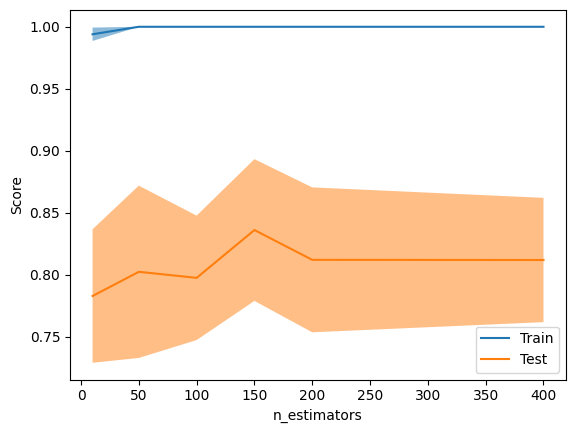

In [1]:
# Preparing Data
import pandas as pd
# Load the rock mines dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url)
column_names = ["sensor_" + str(i) for i in range(1, 61)] + ["target"]
df.columns = column_names
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df['target'] = df['target'].map({'M': 1, 'R': 0})
x_data = df.iloc[:, :60]
x_data = x_data.drop('id', axis=1)
y_data = df['target']

from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
import numpy as np
from sklearn.utils import shuffle
X, y = shuffle(x_data, y_data, random_state=0)
from sklearn.ensemble import RandomForestClassifier
ValidationCurveDisplay.from_estimator(
   RandomForestClassifier(), X, y, param_name="n_estimators", param_range=(10, 50, 100, 150 ,200 ,400)
)
